# Data Visualization with Python Matplotlib for Beginner - Part 2

<p><b>About :</b> Membekali kamu untuk mengerti pemanfaatan library matplotlib dalam melakukan visualisasi data menggunakan pemrograman python. Melalui part 2 ini, kamu akan mempelajari berbagai metode visualisasi dan tujuannya, dan diharapkan mampu membuatnya dengan matplotlib.</p>

<p><b>Course :</b> <a href=https://academy.dqlab.id/main/package/practice/165?pf=0>Data Visualization with Python Matplotlib for Beginner - Part 2</a></p>

<h2>Module Content:</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#jenis-visualisasi-data">Jenis-Jenis Visualisasi Data dan Tujuannya</a></li>
        <li><a href="#multiline-chart">Multi-line Chart dan Kustomisasi Lanjutan</a></li>
        <li><a href="#pie-dan-bar-chart">Pie-Chart dan Bar-Chart</a></li>
        <li><a href="#histogram-dan-scatterplot">Histogram dan Scatterplot</a></li>
        <li><a href="#mini-quiz">Mini Quiz</a></li>
    </ul>
</div>

<h2><a name="jenis-visualisasi-data"></a>Chapter 1: Jenis-Jenis Visualisasi Data dan Tujuannya</h2>

<p>Ada banyak sekali jenis visualisasi data, dari yang sederhana hingga yang kompleks. Setiap jenis visualisasi biasanya lebih tepat digunakan untuk suatu tujuan tertentu. Secara garis besar, ada empat tujuan visualisasi yang disampaikan oleh Andrew Abela sesuai gambar berikut.</p>

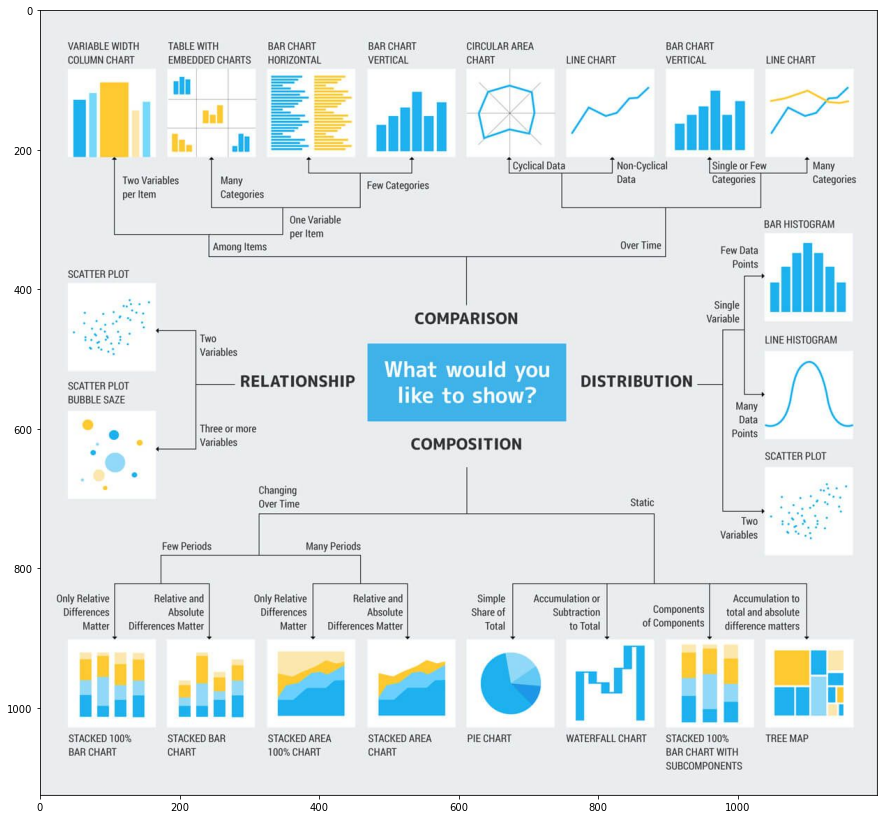

In [1]:
# importing matplotlib modules 
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,15))
img = plt.imread('Resources/tujuan_visualisasi.png') 
plt.imshow(img)

<h4>1. Perbandingan/Komparasi</h4>

<p>Jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan bar-chart.</p>

<h4>2. Distribusi</h4>

<p>Bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.</p>

<h4>3. Komposisi</h4>

<p>Digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.</p>

<h4>4. Keterhubungan/Relasi</h4>

<p>Ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.</p>

<h2><a name="multiline-chart"></a>Chapter 2: Multi-line Chart dan Kustomisasi Lanjutan</h2>

<h4>Membuat Multi-Line Chart</h4>

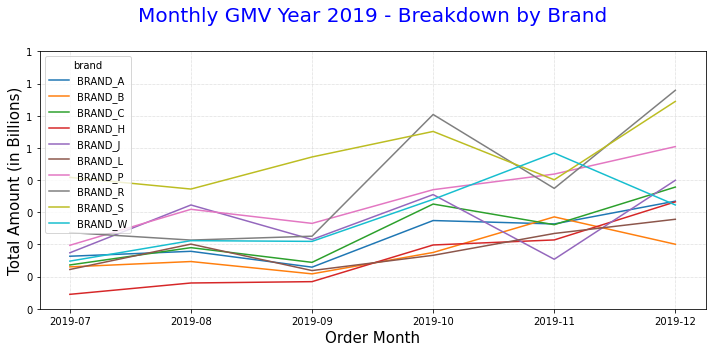

In [2]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

<h4>Kustomisasi Legend</h4>

<p>Atur komponen legend menggunakan function <code>plt.legend()</code>. Beberapa parameter yang bisa ditambahkan untuk legend:</p>

<li><b>loc</b>: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:</li>
<ul>
    <li>'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)</li>
    <li>'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)</li>
    <li>'center': legend diletakkan di tengah-tengah axes</li>
    <li>'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik</li>
</ul>
<li><b>bbox_to_anchor</b>: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.</li>
<li><b>shadow</b>: jika diisi True, maka kotak legend akan memiliki bayangan.</li>
<li><b>ncol</b>: jumlah kolom dari isi legend, defaultnya adalah 1</li>
<li><b>fontsize</b>: ukuran huruf pada legend</li>
<li><b>title</b>: memberikan judul pada legend</li>
<li><b>title_fontsize</b>: ukuran huruf pada judul legend</li>

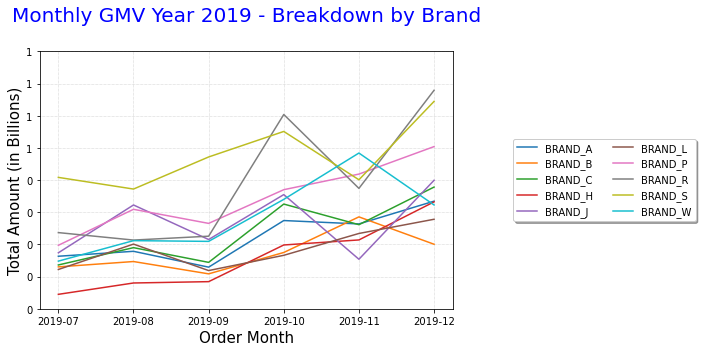

In [3]:
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)    # custom legend
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

<h4>Kustomisasi Colormap</h4>

<Figure size 432x288 with 0 Axes>

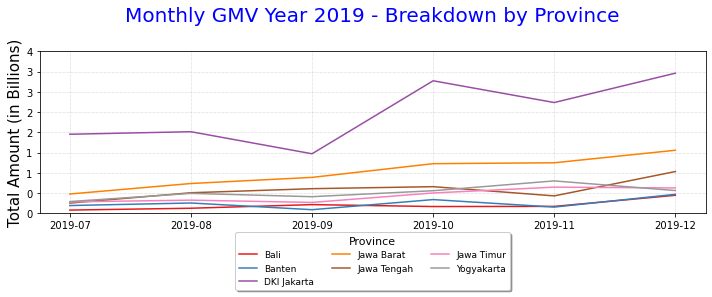

In [4]:
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1') # custom colormap
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

<h4>Line Chart GMV Breakdown by Top Provinces</h4>

In [5]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
top_provinces

province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000

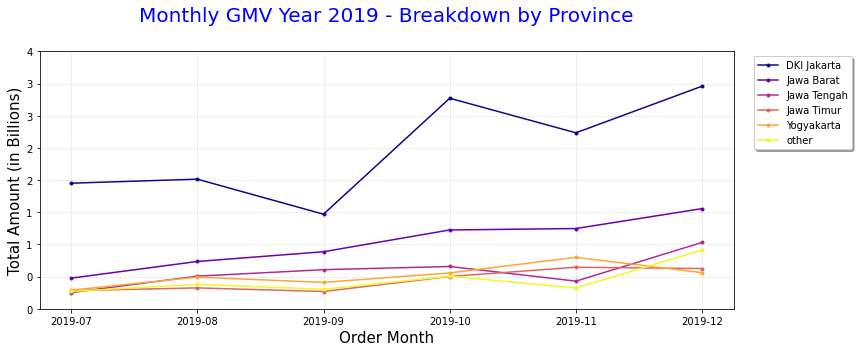

In [6]:
# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

<h4>Membuat Anotasi</h4>

<p>Untuk membuat annotate, gunakan function  plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.</p>

<p>Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:</p>

<li><b>xytext</b>: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)</li>
<li><b>arrowprops</b>:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:</li>
<ul>
    <li><b>arrowstyle</b>: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.</li>
    <li><b>connectionstyle</b>: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.</li>
    <li><b>color</b>: menentukan warna dari panah</li>
</ul>

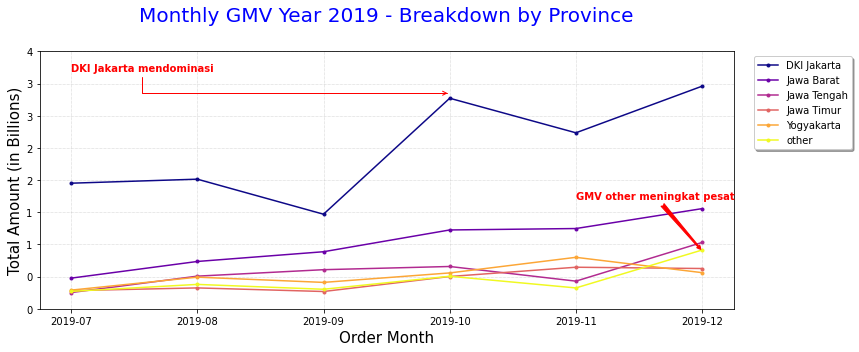

In [7]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
             xytext=(4, 1700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
                             connectionstyle="arc3",
                             color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
             xytext=(0, 3700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle",
                             color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

<h2><a name="pie-dan-bar-chart"></a>Chapter 3: Pie-Chart dan Bar-Chart</h2>

<h4>Membuat Subset Data</h4>

Fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019.

In [8]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month']>='2019-10')]
dataset_dki_q4.head()

order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv province_top  
0  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
2  BRAND_C         8     1045000     2019-11  8360000  DKI Jakarta  
4  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
6  BRAND_C         1     1465000     2019-11  1465000  DKI Jakarta

<h4>Membuat Pie Chart</h4>

<p>Sebelum membuat pie chart kita perlu membuat dataframe agregat. Misalnya  <b>gmv_per_city_dki_q4</b>,  masukkan datanya ke function <code>plt.pie()</code>.</p>

<p>Beberapa parameter yang bisa dimodifikasi:</p>

<li><b>labels</b>: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.</li>
<li><b>colors</b>: array yang berisikan warna untuk masing-masing bagian pie.</li>
<li><b>autopct</b>: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.</li>
<li><b>shadow</b>: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.</li>
<li><b>radius</b>: jari-jari dari pie-chart</li>

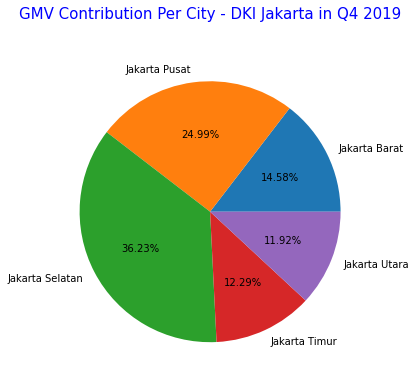

In [9]:
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels=gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

<h4>Membuat Bar Chart</h4>

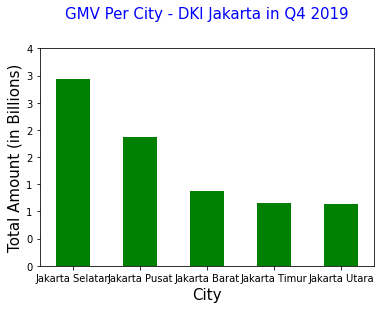

In [10]:
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

<p>Bar chart diatas juga ditambahkan parameter rotation di <code>plt.xtick()</code> untuk memutar label di sumbu-x.</p>

<p>Sebagai catatan, jika ingin barchart-nya horizontal, maka bisa mengganti parameternya menjadi <code>kind='barh'</code>, dengan tentu saja tidak lupa juga harus menyesuaikan sumbu x dan y nya.</p>

<h4>Membuat Multi Bar Chart</h4>

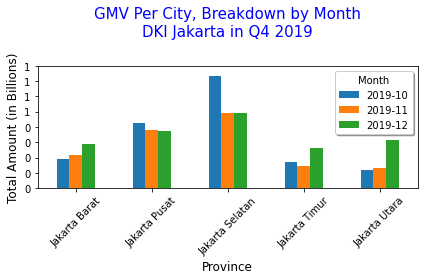

In [11]:
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>Membuat Stacked Chart</h4>

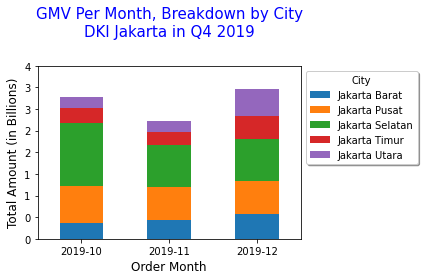

In [12]:
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h2><a name="histogram-dan-scatterplot"></a>Chapter 4: Histogram dan Scatterplot</h2>

<h4>Membuat Agregat Data Customer</h4>

In [13]:
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                     .agg({'order_id':'nunique',
                           'quantity':'sum',
                           'gmv':'sum'})
                     .reset_index()
                     .rename(columns={'order_id':'orders'}))
data_per_customer.sort_values(by='orders', ascending=False)

customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]

<p>Di sini menggunakan function agg untuk melakukan agregasi data. Data agregat per customer yang diambil yaitu jumlah orders (banyaknya unique order_id), total quantity, dan total GMV.</p>

<p>Lalu didapatkan 711 customers yang bertransaksi di DKI Jakarta pada Q4 2020.</p>

<p>Jika diurutkan dari jumlah order terbanyak, bisa dilihat bahwa customer_id 12748 telah melakukan 29 transaksi dengan jumlah quantity mencapai 557, dan GMV lebih dari 175 Juta! Luar biasa ya. Customer-customer seperti ini harus tetap dijaga agar semakin loyal dengan produk.</p>

<h4>Membuat Histogram</h4>

<p>Membuat histogram dengan menggunakan function <code>plt.hist</code> dan memasukkan variabel yang ingin dicek. Parameter lain yang bisa ditambahkan yaitu:</p>

<li><b>bins</b>: jumlah bin (kelompok nilai) yang diinginkan</li>
<li><b>range</b>: nilai minimum dan maksimum yang ditampilkan</li>
<li><b>orientation</b>: ‘horizontal’ atau ‘vertikal’</li>
<li><b>color</b>: warna bar di histogram</li>

<Figure size 432x288 with 0 Axes>

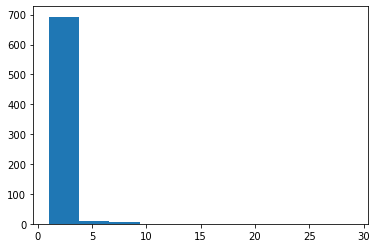

In [14]:
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()

Terlihat bahwa datanya terlalu berat ke kiri, hampir semua customer hanya bertransaksi kurang dari 10, maka dari itu perlu set range-nya, misalnya hanya dari 1 sampai 5.

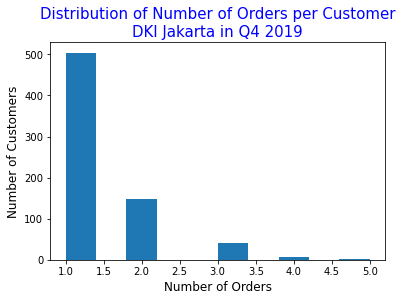

In [15]:
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

membuat histogram untuk quantity

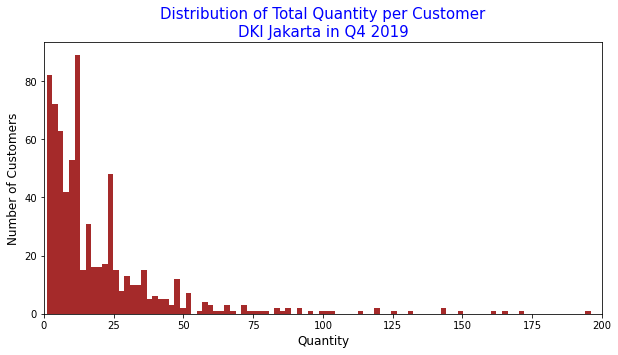

In [16]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200)
plt.show()

membuat histogram untuk GMV

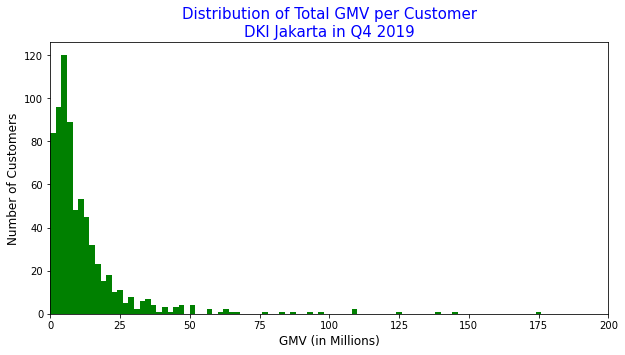

In [17]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations= plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

<h4>Membuat Scatterplot</h4>

Untuk membuat scatterplot, kita dapat menggunakan function <code>plt.scatter</code> dengan memasukkan variabel-variabel yang akan dibuat scatterplot.

<Figure size 432x288 with 0 Axes>

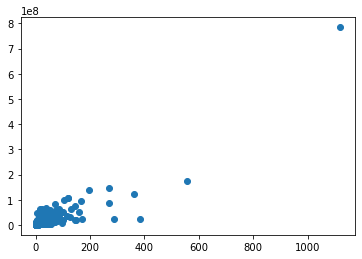

In [18]:
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

Terlihat bahwa memang semakin besar quantity-nya, GMV cenderung semakin tinggi. Tapi masalahnya datanya banyak terkumpul di nilai-nilai kecil, sehingga tidak begitu terlihat detailnya di area situ.

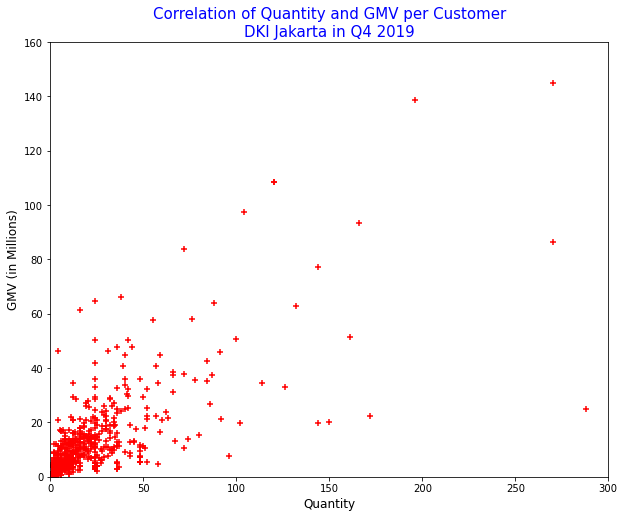

In [19]:
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

Di sini semakin jelas bahwa quantity dan GMV itu berkorelasi positif. Jadi jika suatu customer telah membeli dengan banyak quantity, maka kemungkinan GMV dari dia juga semakin besar.

<h2><a name="mini-quiz"></a>Chapter 5: Mini Quiz</h2>

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Case 1: Menentukan brand top 5</b>
    <div style="padding:25px">
        <p>Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.</p>
        <p><b><u>Case 1:</u></b></p>
        <p>Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.</p>
    </div>
</div>

In [20]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                                                        .sum()
                                                        .reset_index()
                                                        .sort_values(by='quantity',ascending=False)
                                                        .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
top_brands

brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Case 2: Multi-line chart daily quantity untuk brand top 5</b>
    <div style="padding:25px">
        <p>Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.</p>
        <p><b><u>Case 2:</u></b></p>
        <p>Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.</p>
    </div>
</div>

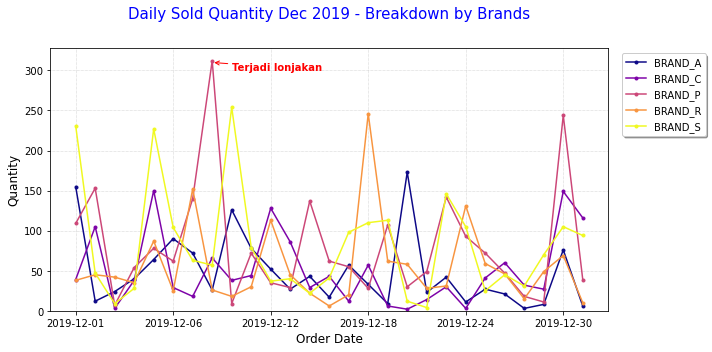

In [21]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Case 3: Kuantitas penjualan brand top 5 selama Desember 2019</b>
    <div style="padding:25px">
        <p>Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.</p>
        <p><b><u>Case 3:</u></b></p>
        <p>Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.</p>
    </div>
</div>

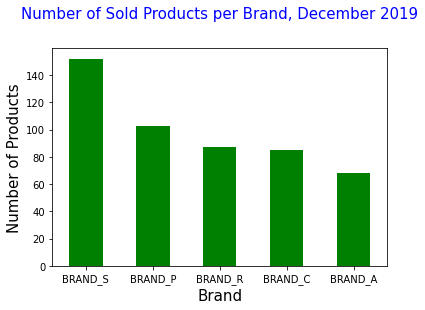

In [22]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Case 4: Penjulan produk diatas 100 dan dibawah 100 selama Desember 2019</b>
    <div style="padding:25px">
        <p>Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.</p>
        <p><b><u>Case 4:</u></b></p>
        <p>Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019. Apakah ada pola yang menarik?</p>
    </div>
</div>

In [23]:
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5brand_dec_per_product.head()

brand product_id  quantity
0  BRAND_A      P0002         1
1  BRAND_A      P0003        32
2  BRAND_A      P0029        12
3  BRAND_A      P0030        30
4  BRAND_A      P0033         1

In [24]:
#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x >= 100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
dataset_top5brand_dec_per_product.head()

brand product_id  quantity quantity_group
58   BRAND_A      P0255       258         >= 100
465  BRAND_S      P3534       234         >= 100
238  BRAND_P      P2770       216         >= 100
245  BRAND_P      P2790       185         >= 100
186  BRAND_P      P2489       170         >= 100

In [25]:
#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
s_sort.head()

brand
BRAND_S    152
BRAND_P    103
BRAND_R     87
BRAND_C     85
BRAND_A     68
Name: product_id, dtype: int64

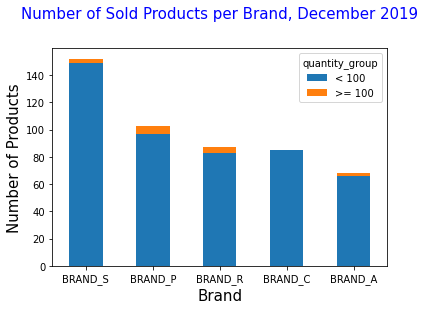

In [26]:
#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Case 5: Murah atau mahalkah harga produk brand top 5</b>
    <div style="padding:25px">
        <p>Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.</p>
        <p><b><u>Case 5:</u></b></p>
        <p>Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?</p>
    </div>
</div>

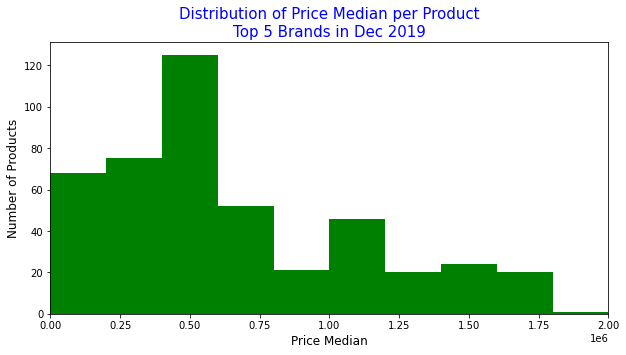

In [27]:
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Case 6a: Korelasi quantity vs GMV</b>
    <div style="padding:25px">
        <p>Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.</p>
        <p><b><u>Case 6a:</u></b></p>
        <p>Untuk setiap product_id, cek scatterplot antara  quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?</p>
    </div>
</div>

In [28]:
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
data_per_product_top5brand_dec

product_id  quantity       gmv  item_price
0        P0002         1    904000      904000
1        P0003        32  14400000      450000
2        P0011         2  11890000     5945000
3        P0029        12   3720000      310000
4        P0030        30   7200000      240000
..         ...       ...       ...         ...
490      P3653         2    298000      149000
491      P3655        12   1908000      159000
492      P3659         3   4395000     1465000
493      P3665         6  14250000     2375000
494      P3666         1   3494000     3494000

[495 rows x 4 columns]

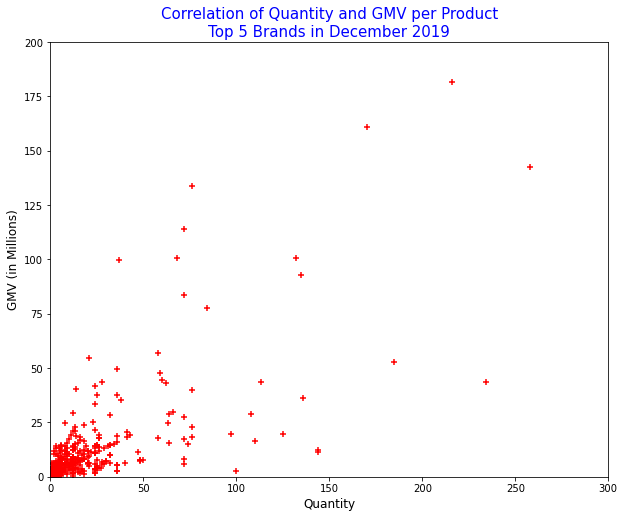

In [29]:
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Case 6b: Korelasi median harga vs quantity</b>
    <div style="padding:25px">
        <p>Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.</p>
        <p><b><u>Case 6b:</u></b></p>
        <p>Untuk setiap product_id, cek scatterplot antara  quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case 6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?</p>
    </div>
</div>

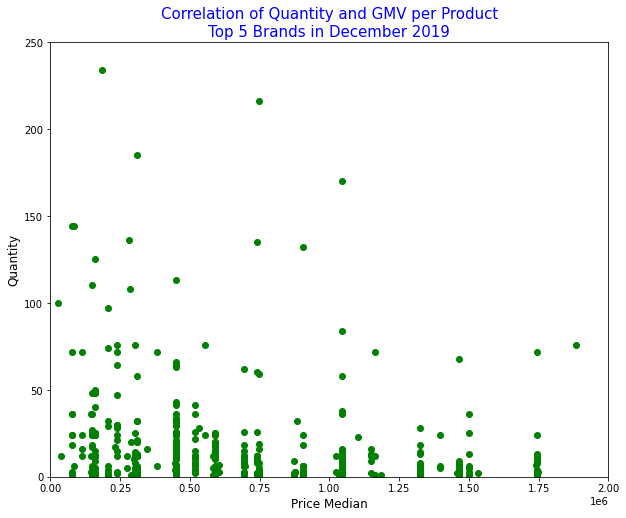

In [30]:
#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()